In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Sample data
data = {
    'Sqft': [1000, 1500, 2000, 2500, 1200],
    'BHK': [2, 3, 3, 4, 2],
    'Location_Score': [5, 7, 6, 9, 4],
    'Price': [30, 45, 60, 75, 35]
}

In [5]:
df = pd.DataFrame(data)
df

,Sqft,BHK,Location_Score,Price
0,1000,2,5,30
1,1500,3,7,45
2,2000,3,6,60
3,2500,4,9,75
4,1200,2,4,35


In [6]:
# Features and target
X = df[['Sqft', 'BHK', 'Location_Score']]
y = df['Price']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# XGBoost model
model = xgb.XGBRegressor(n_estimators=5, max_depth=2, learning_rate=0.1)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=5,
             n_jobs=None, num_parallel_tree=None, ...)

In [29]:
# Prediction
y_pred = model.predict(X_test)

In [30]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 389.6033630371094


/usr/local/lib/python3.11/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Axes: >

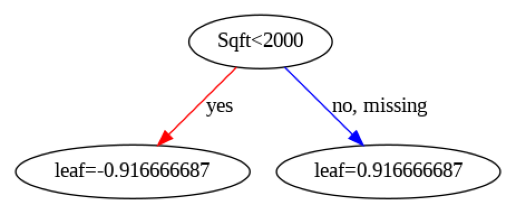

In [31]:
xgb.plot_tree(model, num_trees=0)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

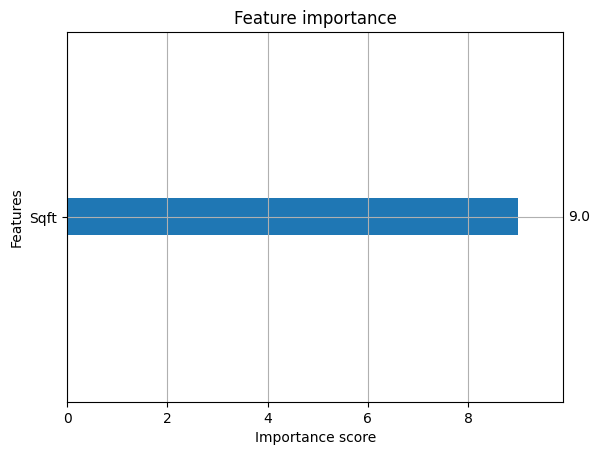

In [32]:
xgb.plot_importance(model)
